<a href="https://colab.research.google.com/github/farimaahchz/06_Income_inequality_in_relation_to_GDP/blob/main/06_Income_inequality_in_relation_to_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01- Importig necessary modules**



---



In [313]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re

%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


# **02- importing the datasets**



---




*   Gini_index for Income Inequality
*   GDP data for country's Gross Domestrict Product






In [314]:
# Loading the datasets
df_gini_index = pd.read_csv( 'https://raw.githubusercontent.com/farimaahchz/06_Income_inequality_in_relation_to_GDP/main/economic-inequality-gini-index.csv')
print(df_gini_index.shape)
print(df_gini_index.columns)
display(df_gini_index)


(2125, 4)
Index(['Entity', 'Code', 'Year', 'Gini coefficient'], dtype='object')


Entity Code  Year  Gini coefficient
0      Albania  ALB  1996          0.270103
1      Albania  ALB  2002          0.317390
2      Albania  ALB  2005          0.305957
3      Albania  ALB  2008          0.299847
4      Albania  ALB  2012          0.289605
...        ...  ...   ...               ...
2120    Zambia  ZMB  2010          0.556215
2121    Zambia  ZMB  2015          0.571361
2122  Zimbabwe  ZWE  2011          0.431536
2123  Zimbabwe  ZWE  2017          0.443371
2124  Zimbabwe  ZWE  2019          0.502565

[2125 rows x 4 columns]

In [315]:
# 2.GDP
df_GDP = pd.read_csv( 'https://raw.githubusercontent.com/farimaahchz/06_Income_inequality_in_relation_to_GDP/main/gdp-per-capita-maddison-2020.csv')
print(df_GDP.shape)
print(df_GDP.columns)
display(df_GDP)

(19876, 5)
Index(['Entity', 'Code', 'Year', 'GDP per capita', '417485-annotations'], dtype='object')


Entity Code  Year  GDP per capita 417485-annotations
0      Afghanistan  AFG  1950       1156.0000                NaN
1      Afghanistan  AFG  1951       1170.0000                NaN
2      Afghanistan  AFG  1952       1189.0000                NaN
3      Afghanistan  AFG  1953       1240.0000                NaN
4      Afghanistan  AFG  1954       1245.0000                NaN
...            ...  ...   ...             ...                ...
19871     Zimbabwe  ZWE  2014       1594.0000                NaN
19872     Zimbabwe  ZWE  2015       1560.0000                NaN
19873     Zimbabwe  ZWE  2016       1534.0000                NaN
19874     Zimbabwe  ZWE  2017       1582.3662                NaN
19875     Zimbabwe  ZWE  2018       1611.4052                NaN

[19876 rows x 5 columns]

# **03- General preparation of data**

---





In [316]:
#dropping the irrelevant columns in both data frames:
#'Code' in df_gini_index
df_gini_index = df_gini_index.drop(['Code'], axis = 1)

# 'Code' & '417485-annotations' in df_GDP
df_GDP = df_GDP.drop(['Code', '417485-annotations'], axis = 1)

print(df_gini_index.columns)
print(df_GDP.columns)

Index(['Entity', 'Year', 'Gini coefficient'], dtype='object')
Index(['Entity', 'Year', 'GDP per capita'], dtype='object')


In [317]:
#creating one dataframe by merging the two datasets based on Entity and Year
df = pd.merge(df_gini_index, df_GDP, how = 'outer', on= ['Entity', 'Year'] )

In [318]:
#dropping the NaN values
df = df.dropna()
#renaming the columns
df.columns = ['country', 'year', 'gini_index', 'GDP']

In [319]:
#converting the 'Year' column to datetime to ensure compatibility
df['year']= pd.to_datetime(df['year'],  format='%Y').dt.year
df

<ipython-input-319-9f96fd57eadd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']= pd.to_datetime(df['year'],  format='%Y').dt.year


country  year  gini_index        GDP
0      Albania  1996    0.270103  3965.6853
1      Albania  2002    0.317390  5608.9624
2      Albania  2005    0.305957  6858.4670
3      Albania  2008    0.299847  8522.1300
4      Albania  2012    0.289605  9592.0000
...        ...   ...         ...        ...
2119    Zambia  2006    0.546175  2133.5940
2120    Zambia  2010    0.556215  3032.0679
2121    Zambia  2015    0.571361  3478.0000
2122  Zimbabwe  2011    0.431536  1515.0000
2123  Zimbabwe  2017    0.443371  1582.3662

[1810 rows x 4 columns]

# **04- Correlation Coefficient of the GDP and the Gini coefficient**


---



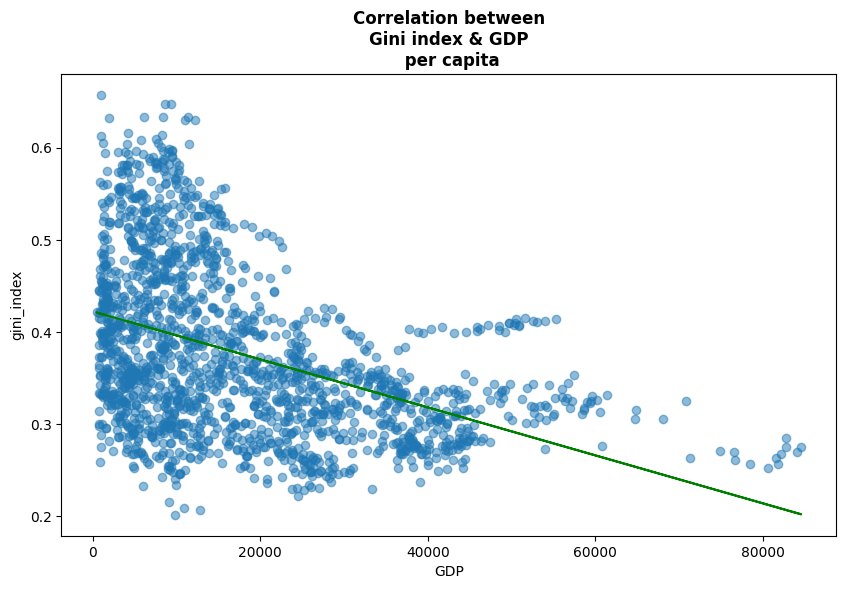

In [320]:
# Correlation between the GDP and gini_index income inquality in the world
#since we want to dicover if there is a realtionship between GDP and gini index we can visualize our data with scatterplot

plt.figure(figsize=(10, 6))

# by using linear regression line in this chart we can find the general realtionship in GDP and Gini_index
slope, intercept = np.polyfit(df['GDP'],df['gini_index'], 1)
plt.plot(df['GDP'], slope * df['GDP'] + intercept, color='green')

plt.scatter(df['GDP'],df['gini_index'], alpha=0.5)
plt.xlabel('GDP')
plt.ylabel('gini_index')
plt.title('Correlation between\nGini index & GDP\n per capita', fontweight = 'bold')
plt.show()


In [321]:
# calculating the correlation coëfficient method1
coeff = np.corrcoef(df['GDP'], df['gini_index'])
coeff

array([[ 1.        , -0.43225807],
       [-0.43225807,  1.        ]])

In [322]:
#method2
#df.corr()
#filtering year
display(df.loc[:,['GDP', 'gini_index']].corr())


GDP  gini_index
GDP         1.000000   -0.432258
gini_index -0.432258    1.000000

# **Conclusion:**


---



As we can see the correlation coefficient between GDP and gini index is  ***-0.43***  
which is a negative amount. This indicates generally as GDP increases, there is a trend that income enquality most likely will decrease and vice versa.

**!!!** It is important to remember that other factors can also play a role in this relationship. Although a negative correlation has been observed in the analysis, It could be different for individual countries with different social and political situations.


---



In [324]:
#checking the corrlation for the available factors we have based on year (finding the average amount for each column for each year)
df_year = df.groupby('year')
df_year = df_year.mean()


df_yer_corr = df_year['GDP'].corr(df_year['gini_index'])
df_yer_corr

<ipython-input-324-c6ffa3c14419>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df_year.mean()


-0.4869788740376087


*we can see that correlation based on year is still negative -0.48.*

In [327]:
#checking the corrlation for the available factors we have based on countries
df_country = df.groupby('country').apply(lambda x: x['GDP'].corr(x['gini_index'])).reset_index()
df_country.columns = ['country', 'correlation']
display(df_country)
df_country['correlation'].mean()


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


country  correlation
0      Albania     0.567214
1      Algeria    -0.934937
2       Angola    -0.409606
3      Armenia    -0.583625
4    Australia     0.819584
..         ...          ...
142  Venezuela     0.090274
143    Vietnam    -0.141560
144      Yemen    -0.587702
145     Zambia     0.392477
146   Zimbabwe     1.000000

[147 rows x 2 columns]

-0.13296448682138534


*To have a better understanding of the findings, we also had a look at the correaltion for each individual country. It is clear, that even though some countries show positive correlation the overall trend overal trend is still negative.*